# Controlling figure aesthetics

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

    画出有吸引力的figure很重要。 可视化也是向读者传达定量见解的核心，在这种情况下，更需要有能够引起注意并吸引观众的figure。

    Matplotlib 是高度可定制的，但很难知道要调整哪些设置来获得吸引人的figure。 Seaborn 带有许多自定义style和用于控制 matplotlib 图形外观的高级界面。

    定义一个简单的函数来绘制一些偏移正弦波，并尝试调整的不同风格参数。

In [5]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

    这是mapotlib的默认绘图

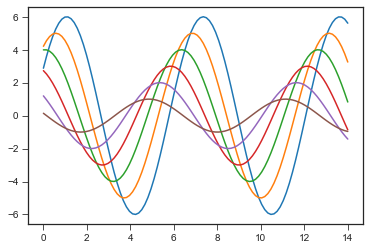

In [6]:
sinplot()

    要切换到 seaborn 默认值，只需调用 set_theme() 函数。

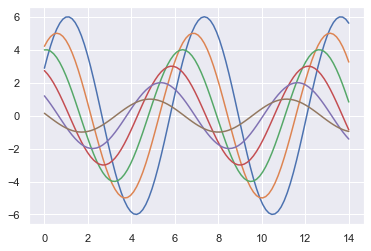

In [7]:
sns.set_theme()
sinplot()

    Seaborn 将 matplotlib 参数分成两个独立的组。 第一组设置 plot style，第二组 figure scales。

    有2个函数作为接口操作这些参数。要控制syle，可使用 axes_style() 和 set_style() 函数。 要设置scales，可使用 plotting_context() 和 set_context() 函数。 在这两种情况下，第一个函数都返回一个参数字典，第二个函数设置 matplotlib 默认值。

## Seaborn figure styles

    有五个预设的 seaborn 主题：darkgrid、whitegrid、dark、white 和 ticks。它们各自适合不同的应用和个人喜好。 默认主题是darkgrid。 如上所述，网格有助于绘图用作定量信息的查找表，而白色灰色有助于防止网格与表示数据的线竞争。 whitegrid 主题是类似的，但它更适合具有大量数据元素的绘图：

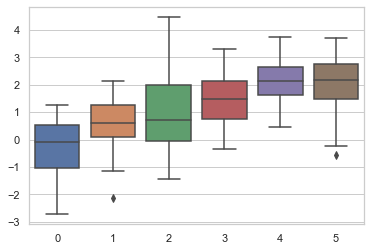

In [8]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

    对于许多绘图网格的必要性较低。

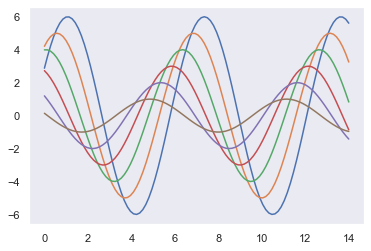

In [9]:
sns.set_style("dark")
sinplot()

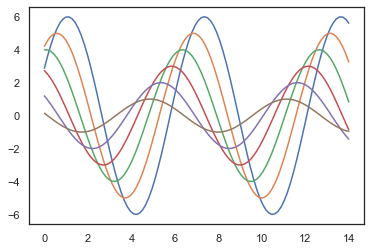

In [10]:
sns.set_style("white")
sinplot()

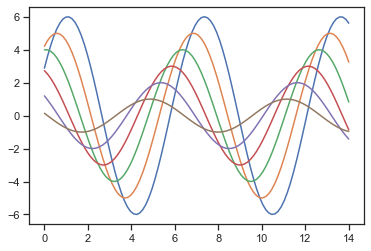

In [11]:
sns.set_style("ticks")
sinplot()

## Removing axes spines

    white 和 ticks 样式都可以从删除不需要的顶部和右侧轴。 可以调用 seaborn 函数 despine() 删除它们。

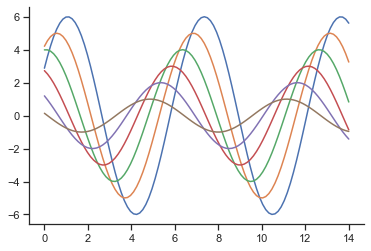

In [12]:
sinplot()
sns.despine()

    despine() 的 trim 参数将限制剩余的spines的范围

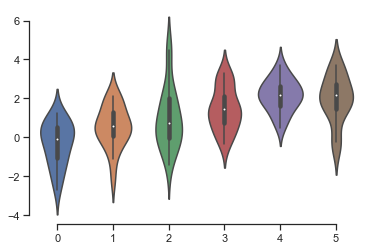

In [17]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(trim=True);

    可以使用 depine() 的附加参数来控制删除哪些spine：

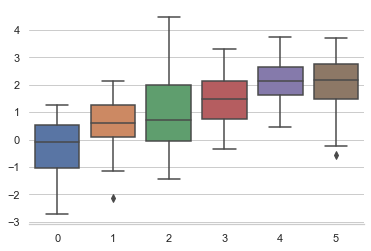

In [20]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

## Temporarily setting figure style

    虽然来回切换很容易，也可以在 with 语句（上下文管理器）中使用 axes_style() 函数来临时设置绘图参数。 这也允许使用不同style的axes制作图形：

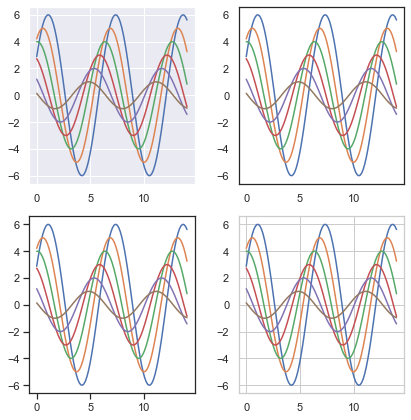

In [21]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot()

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sinplot()

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sinplot()

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot()

f.tight_layout()

## Overriding elements of the seaborn styles

    如果要自定义 seaborn style，可以将参数字典传递给 axes_style() 和 set_style() 的 rc 参数。 请注意，只能通过此方法覆盖作为样式定义一部分的参数。 （但是，更高级别的 set_theme() 函数采用任何 matplotlib 参数的字典）。

    如果要查看包含哪些参数，可以只调用不带参数的函数，它将返回当前设置：

In [22]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

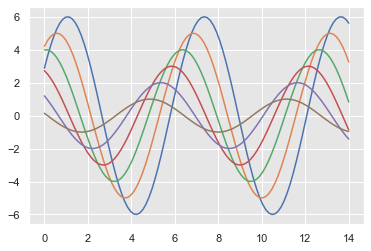

In [23]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

## Scaling plot elements

    单独的一组参数控制绘图元素的比例，允许使用相同的代码来制作适合在较大或较小绘图适合的设置中使用的绘图。

    首先让我们通过调用 set_theme() 来重置默认参数：

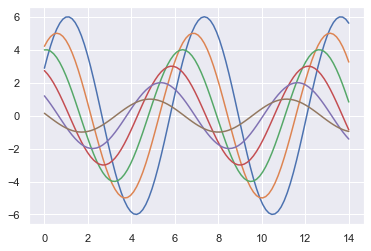

In [26]:
sns.set_theme()
sinplot()

    四个预设，按相对大小排列，分别是paper, notebook, talk, 和 poster。 notebook样式是默认样式，如上图。

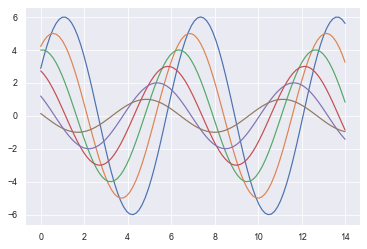

In [25]:
sns.set_context("paper")
sinplot()

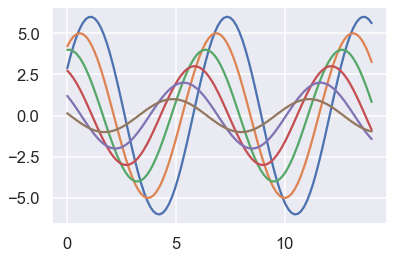

In [27]:
sns.set_context("talk")
sinplot()

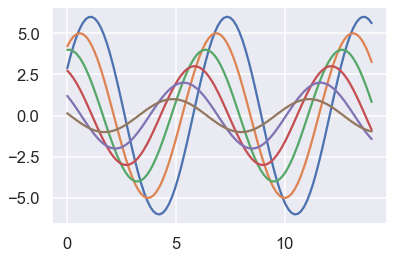

In [28]:
sns.set_context("talk")
sinplot()

    可以使用这些上述4种之一调用 set_context() 来设置参数，并且可以通过提供参数值字典来覆盖某些参数。



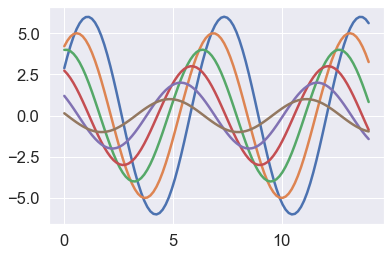

In [29]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()